# Sprint 10 - Proyecto

Autor: Fernando Pirrongelli

## Paso 1: Acceso y Preparación de Datos

En este paso, cargaremos los archivos y nos aseguraremos de que Python no trate las fechas como simple texto, sino como objetos de tiempo para poder calcular duraciones.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

# 2. Función para limpiar nombres de columnas
def clean_columns(df):
    # Pone en minúsculas, quita espacios al inicio/final y reemplaza espacios intermedios por _
    df.columns = [col.lower().strip().replace(' ', '_') for col in df.columns]
    return df

visits = clean_columns(visits)
orders = clean_columns(orders)
costs = clean_columns(costs)

# 3. Conversión de fechas (ahora con nombres adecuados para el análisis de datos)
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Se verifica cómo quedaron los nombres
print("Columnas de Visits:", visits.columns.tolist())
print("Columnas de Orders:", orders.columns.tolist())
print("Columnas de Costs:", costs.columns.tolist())

Columnas de Visits: ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
Columnas de Orders: ['buy_ts', 'revenue', 'uid']
Columnas de Costs: ['source_id', 'dt', 'costs']


Se ha estandarizado los nombres de las columnas convirtiéndolos a minúsculas y reemplazando espacios por guiones bajos. Esto evita errores de escritura y sigue las mejores prácticas de Python (PEP 8). También se aseguró la conversión de tipos datetime.

In [8]:
# Visualizamos las primeras filas para entender la estructura
print(visits.head())
print(orders.head())
print(costs.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
               buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450
   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          

In [9]:
# Verificamos que los tipos de datos sean correctos
print(visits.info())
print(orders.info())
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entri

Tras la importación de las librerías necesarias para el análisis (Pandas) y la visualización (Matplotlib/Seaborn), un paso crítico aquí fue convertir las columnas que contienen fechas de tipo 'object' a 'datetime64', ya que esto permitirá realizar cálculos matemáticos con el tiempo, como la duración de las sesiones.

## Paso 2.1: Informes y Métricas (Visitas)

Con los datos cargados, se procede a responder las siguientes preguntas:

1-¿Cuántas personas usan Showz cada día, semana y mes?

In [10]:
# Creamos columnas de tiempo necesarias
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.to_period('M').dt.to_timestamp()
visits['session_week']  = visits['start_ts'].dt.isocalendar().week
visits['session_date']  = visits['start_ts'].dt.date

# Calculamos promedios
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau = visits.groupby('session_month').agg({'uid': 'nunique'}).mean()

# Imprimimos resultados convirtiendo a entero
print(f"Usuarios promedio por día (DAU): {int(dau.iloc[0])}")
print(f"Usuarios promedio por semana (WAU): {int(wau.iloc[0])}")
print(f"Usuarios promedio por mes (MAU): {int(mau.iloc[0])}")

Usuarios promedio por día (DAU): 907
Usuarios promedio por semana (WAU): 5716
Usuarios promedio por mes (MAU): 23228


2-¿Cuántas sesiones hay por día? Sabiendo que un usuario puede tener más de una sesión.

Número promedio de sesiones totales por día: 987.36
------------------------------
Promedio de sesiones diarias por dispositivo:
 - Desktop: 721.34 sesiones/día
 - Touch: 266.76 sesiones/día
------------------------------
Promedio de sesiones por usuario al día: 1.08


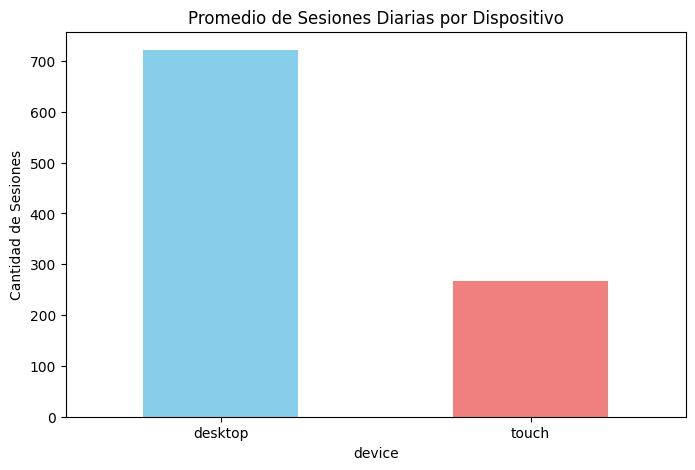

In [27]:
# 1. Promedio general de sesiones por día
sessions_per_day = visits.groupby('session_date').agg({'uid': 'count'}).rename(columns={'uid': 'session_count'})
avg_sessions_per_day = sessions_per_day['session_count'].mean()

# 2. Promedio de sesiones diarias POR DISPOSITIVO
# Agrupamos por fecha y dispositivo, contamos filas, y luego sacamos el promedio por dispositivo
sessions_by_device = visits.groupby(['session_date', 'device']).agg({'uid': 'count'}).reset_index()
avg_sessions_device = sessions_by_device.groupby('device')['uid'].mean()

# 3. Promedio de sesiones por usuario al día
sessions_per_user = visits.groupby('session_date').agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

# --- PRINTS DE RESPUESTA ---
print(f"Número promedio de sesiones totales por día: {avg_sessions_per_day:.2f}")
print("-" * 30)
print("Promedio de sesiones diarias por dispositivo:")
for device, value in avg_sessions_device.items():
    print(f" - {device.capitalize()}: {value:.2f} sesiones/día")
print("-" * 30)
print(f"Promedio de sesiones por usuario al día: {sessions_per_user['sessions_per_user'].mean():.2f}")

# Visualización
plt.figure(figsize=(8, 5))
avg_sessions_device.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Promedio de Sesiones Diarias por Dispositivo')
plt.ylabel('Cantidad de Sesiones')
plt.xticks(rotation=0)
plt.show()

Se ha calculado el total de sesiones diarias. Es importante notar la diferencia entre el DAU (usuarios únicos) y el conteo de sesiones, ya que un usuario puede entrar varias veces al día para comparar precios de entradas antes de decidirse.

3-¿Cuál es la duración de cada sesión?

In [13]:
# Calculamos la duración de cada sesión en segundos
visits['duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()

# La duración promedio (ASL) a veces se ve afectada por valores atípicos, usamos la moda o mediana
asl = visits['duration_sec'].median()
print(f"La duración promedio de una sesión (mediana) es de: {asl} segundos")

La duración promedio de una sesión (mediana) es de: 300.0 segundos


4-¿Con qué frecuencia los usuarios regresan?

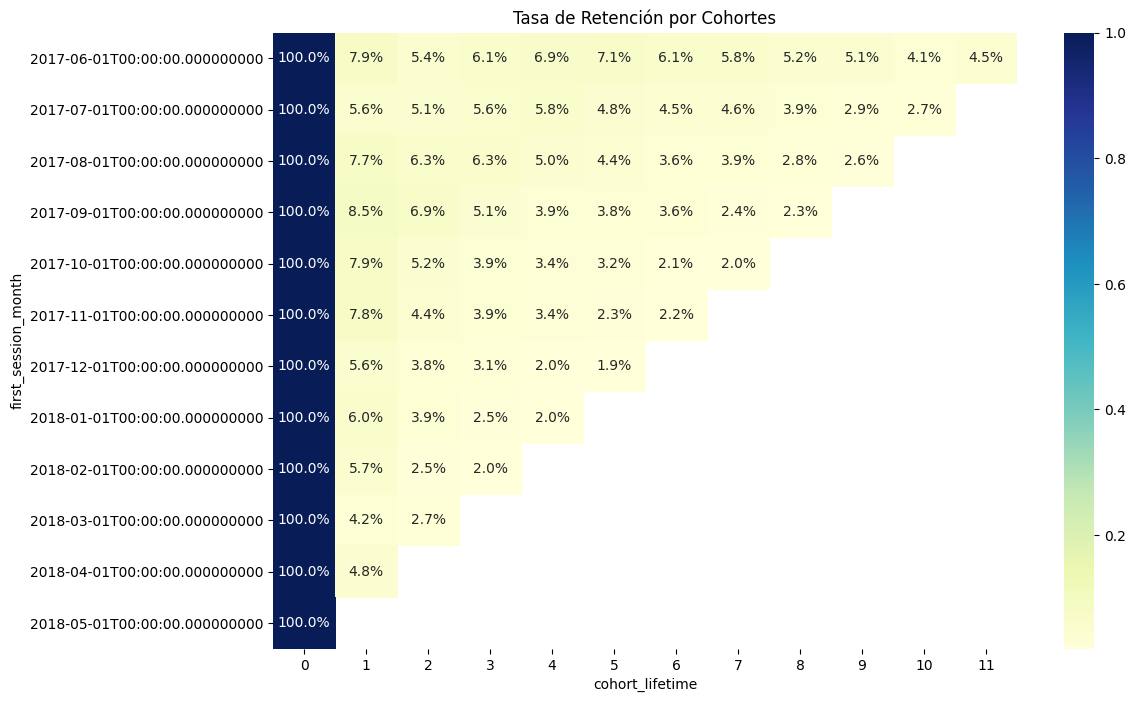

In [15]:
# 1. Encontrar el mes de la primera visita de cada usuario
first_visit_month = visits.groupby('uid')['session_month'].min().reset_index()
first_visit_month.columns = ['uid', 'first_session_month']

# 2. Unir esta información con la tabla de visitas original
visits_with_cohorts = pd.merge(visits, first_visit_month, on='uid')

# 3. Calcular la "edad" de la cohorte (cuántos meses han pasado desde la primera visita)
visits_with_cohorts['cohort_lifetime'] = (
    (visits_with_cohorts['session_month'] - visits_with_cohorts['first_session_month']) / np.timedelta64(1, 'M')
).round().astype(int)

# 4. Crear la tabla de cohortes
cohorts = visits_with_cohorts.groupby(['first_session_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

# 5. Calcular la retención basándonos en el tamaño inicial de la cohorte (mes 0)
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month', 'uid']]
initial_users_count.columns = ['first_session_month', 'cohort_users']

cohorts = pd.merge(cohorts, initial_users_count, on='first_session_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

# 6. Crear una tabla pivote para el mapa de calor
retention_pivot = cohorts.pivot_table(index='first_session_month', columns='cohort_lifetime', values='retention', aggfunc='sum')

# Visualización
plt.figure(figsize=(12, 8))
sns.heatmap(retention_pivot, annot=True, fmt='.1%', cmap='YlGnBu')
plt.title('Tasa de Retención por Cohortes')
plt.show()

La tasa de retención es baja y disminuye rápidamente tras el primer mes, situándose generalmente por debajo del 10% a partir del mes 1. Esto indica que la gran mayoría de los usuarios no regresa habitualmente al servicio tras su experiencia inicial.

### Notas

-Para entender la frecuencia de uso, se calculó el DAU, WAU y MAU. Estas métricas nos dicen qué tan efectivo es nuestro producto. Además, se calculó la duración de la sesión. 

-Se usó la mediana en lugar de la media para la duración de la sesión porque los datos de tiempo suelen tener valores extremos que pueden sesgar el promedio.

## Paso 2.2: Informes y Métricas - Análisis de Ventas (Conversión y LTV)

Aquí se procederá a responder las preguntas relacionadas con ventas, las cuales son:

1-¿Cuándo empieza la gente a comprar?

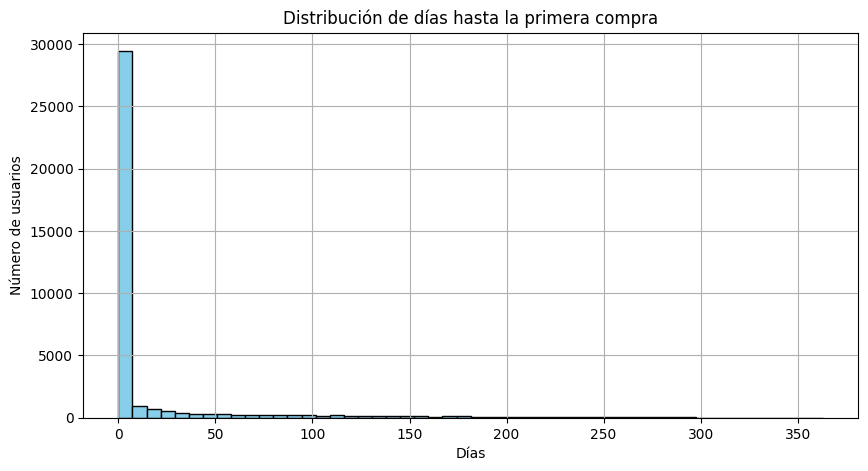

El tiempo promedio de conversión es: 16.73 días
La mediana del tiempo de conversión es: 0.00 días


In [16]:
# Buscamos la fecha de la primera visita
first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit_ts']

# Buscamos la fecha de la primera compra
first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_order_ts']

# Unimos y calculamos la diferencia en días
conversion = pd.merge(first_visits, first_orders, on='uid')
conversion['days_to_convert'] = (conversion['first_order_ts'] - conversion['first_visit_ts']).dt.days

# Visualización del tiempo de conversión
plt.figure(figsize=(10, 5))
conversion['days_to_convert'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de días hasta la primera compra')
plt.xlabel('Días')
plt.ylabel('Número de usuarios')
plt.show()

print(f"El tiempo promedio de conversión es: {conversion['days_to_convert'].mean():.2f} días")
print(f"La mediana del tiempo de conversión es: {conversion['days_to_convert'].median():.2f} días")

2-¿Cuántos pedidos hacen durante un período de tiempo dado? y 3-¿Cuál es el tamaño promedio de compra?

--- RESULTADOS GLOBALES ---
¿Cuántos pedidos hacen? Se realizaron un total de 50415 pedidos en el periodo analizado.
¿Cuál es el tamaño promedio de compra? El ticket promedio por pedido es de 5.00 unidades monetarias.
------------------------------
Promedio de pedidos mensuales: 3878.08
Mes con más ventas: 2017-12


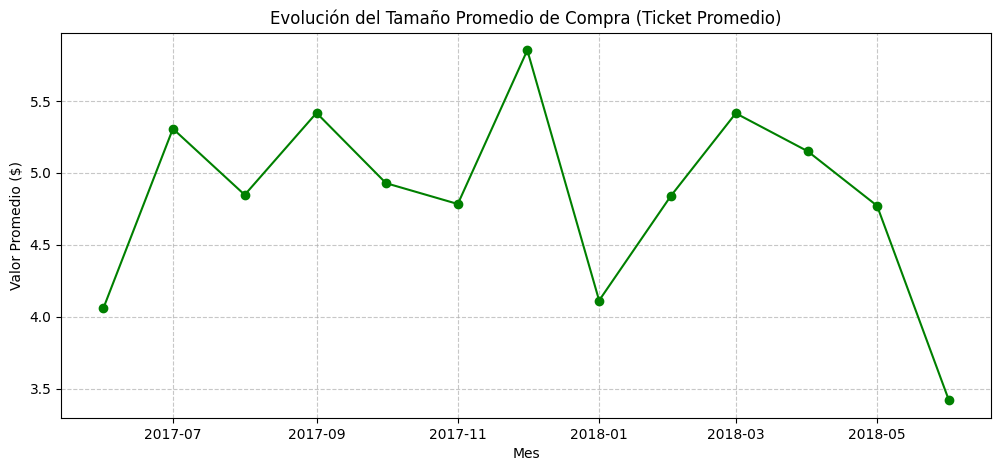

In [18]:
# 1. Aseguramos que tenemos el mes de la compra
orders['order_month'] = orders['buy_ts'].dt.to_period('M').dt.to_timestamp()

# 2. Agrupamos para obtener el total de pedidos y el promedio de compra
# Calculamos el total general primero
total_orders = orders['uid'].count()
avg_purchase_size = orders['revenue'].mean()

# 3. Agrupamos por mes para ver la evolución
monthly_stats = orders.groupby('order_month').agg({'revenue': 'sum', 'uid': 'count'}).reset_index()
monthly_stats.columns = ['month', 'revenue', 'n_orders']
monthly_stats['avg_ticket'] = monthly_stats['revenue'] / monthly_stats['n_orders']

print(f"--- RESULTADOS GLOBALES ---")
print(f"¿Cuántos pedidos hacen? Se realizaron un total de {total_orders} pedidos en el periodo analizado.")
print(f"¿Cuál es el tamaño promedio de compra? El ticket promedio por pedido es de {avg_purchase_size:.2f} unidades monetarias.")
print("-" * 30)
print(f"Promedio de pedidos mensuales: {monthly_stats['n_orders'].mean():.2f}")
print(f"Mes con más ventas: {monthly_stats.loc[monthly_stats['n_orders'].idxmax(), 'month'].strftime('%Y-%m')}")

# 4. Visualización
plt.figure(figsize=(12, 5))
plt.plot(monthly_stats['month'], monthly_stats['avg_ticket'], marker='o', color='green', label='Ticket Promedio')
plt.title('Evolución del Tamaño Promedio de Compra (Ticket Promedio)')
plt.xlabel('Mes')
plt.ylabel('Valor Promedio ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

4-¿Cuánto dinero traen? (LTV)

--- ANÁLISIS DE VALOR DE VIDA (LTV) ---
¿Cuánto dinero aportan los clientes? El LTV acumulado promedio al final de los periodos es de 6.99 USD.
------------------------------


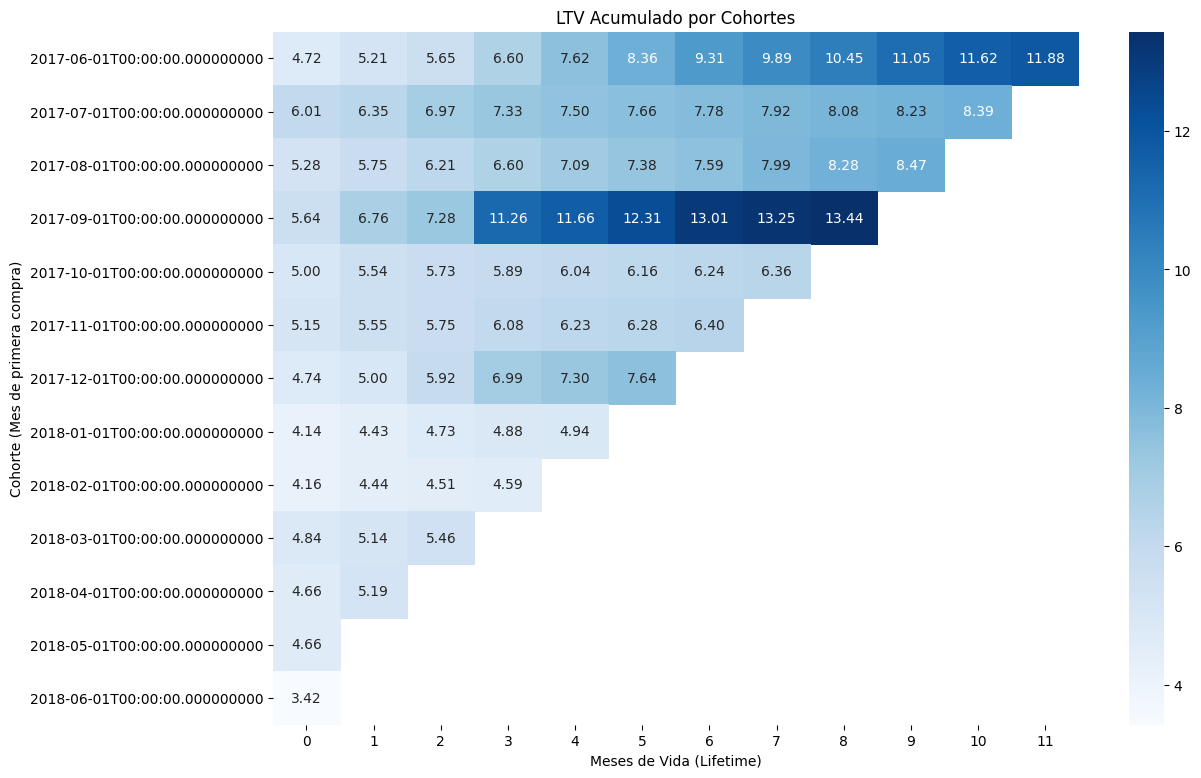

In [20]:
# 1. Encontrar el mes de la primera compra para cada usuario
first_order_dates = orders.groupby('uid')['order_month'].min().reset_index()
first_order_dates.columns = ['uid', 'first_order_month']

# 2. Unir con la tabla de pedidos
orders_with_cohorts = pd.merge(orders, first_order_dates, on='uid')

# 3. Calcular la "edad" de la cohorte en meses (lifetime)
orders_with_cohorts['cohort_lifetime'] = (
    (orders_with_cohorts['order_month'] - orders_with_cohorts['first_order_month']) / np.timedelta64(1, 'M')
).round().astype(int)

# 4. Agrupar por mes de inicio y tiempo de vida para sumar ingresos
cohorts_revenue = orders_with_cohorts.groupby(['first_order_month', 'cohort_lifetime']).agg({'revenue': 'sum'}).reset_index()

# 5. Encontrar cuántos usuarios hay en cada cohorte (el tamaño de la cohorte)
cohort_sizes = first_order_dates.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# 6. Unir ingresos con tamaños de cohorte y calcular LTV
report = pd.merge(cohort_sizes, cohorts_revenue, on='first_order_month')
report['ltv'] = report['revenue'] / report['n_buyers']

# 7. Crear tabla pivote para visualizar LTV acumulado
ltv_pivot = report.pivot_table(
    index='first_order_month', 
    columns='cohort_lifetime', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1) # Usamos cumsum para ver el valor acumulado en el tiempo

# --- PRINT DE RESPUESTA---
total_ltv = report['ltv'].sum()
print(f"--- ANÁLISIS DE VALOR DE VIDA (LTV) ---")
print(f"¿Cuánto dinero aportan los clientes? El LTV acumulado promedio al final de los periodos es de {report.groupby('first_order_month')['ltv'].sum().mean():.2f} USD.")
print("-" * 30)

# 8. Visualización con Mapa de Calor
plt.figure(figsize=(13, 9))
sns.heatmap(ltv_pivot, annot=True, fmt='.2f', cmap='Blues')
plt.title('LTV Acumulado por Cohortes')
plt.xlabel('Meses de Vida (Lifetime)')
plt.ylabel('Cohorte (Mes de primera compra)')
plt.show()

### Notas

Se ha analizado el ciclo de vida de compra. Al notar que la mediana de conversión es 0, significa que la mayoría de los usuarios compran el mismo día que entran.

Este análisis muestra el 'embudo' de ventas. Si la mayoría de los usuarios compran el día 0, significa que vienen con una intención de compra clara. Si tardan mucho, quizás el proceso de checkout es complicado.

## Paso 2.3: Informes y Métricas - Marketing y Rentabilidad (ROMI)

Para responder las preguntas de Marketing, se realizaron los siguientes pasos:

1-¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)

--- ANÁLISIS DE GASTOS ---
¿Cuánto dinero se gastó en total? 329,131.62 USD.

Gasto por fuente de adquisición:
   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


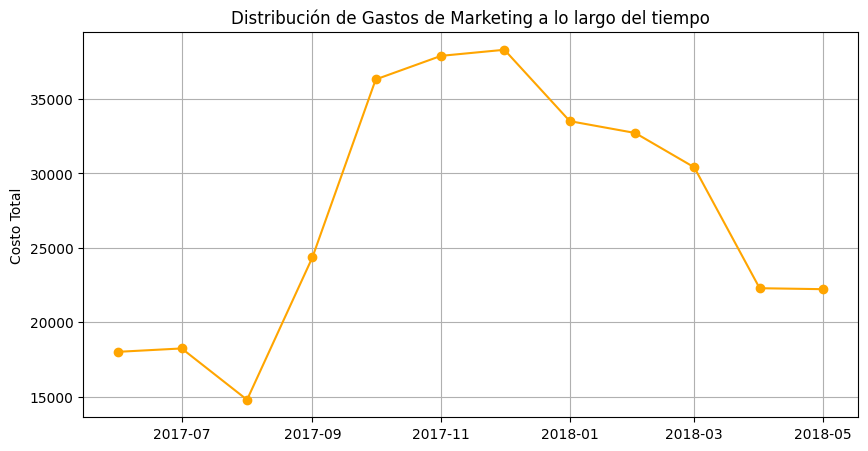

In [24]:
# 1. Gasto Total
total_spent = costs['costs'].sum()

# 2. Gasto por Fuente
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

# 3. Gasto a lo largo del tiempo (Mensual)
costs['month'] = costs['dt'].dt.to_period('M').dt.to_timestamp()
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()

# --- PRINT DE RESPUESTA ---
print(f"--- ANÁLISIS DE GASTOS ---")
print(f"¿Cuánto dinero se gastó en total? {total_spent:,.2f} USD.")
print("\nGasto por fuente de adquisición:")
print(costs_by_source)

# Gráfico de gasto mensual
plt.figure(figsize=(10, 5))
plt.plot(monthly_costs['month'], monthly_costs['costs'], marker='o', color='orange')
plt.title('Distribución de Gastos de Marketing a lo largo del tiempo')
plt.ylabel('Costo Total')
plt.grid(True)
plt.show()

2-¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?


--- COSTO DE ADQUISICIÓN POR FUENTE ---
   source_id        cac
6         10   4.381106
5          9   5.071222
3          4   5.931779
0          1   7.186364
4          5   7.467479
1          2  12.209367
2          3  13.493901


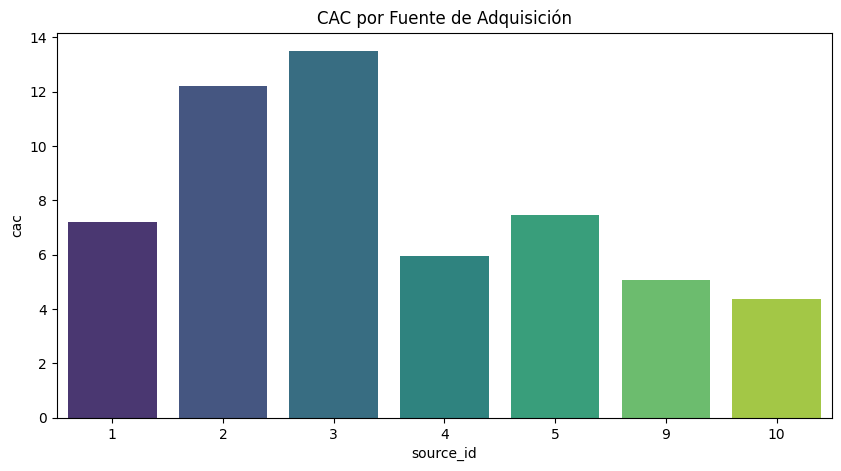

In [25]:
# Buscamos la primera fuente de cada usuario
user_first_source = visits.sort_values(by='start_ts').groupby('uid').agg({'source_id': 'first'}).reset_index()

# Identificamos a los que compraron (clientes)
buyers = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
buyers_with_source = pd.merge(buyers, user_first_source, on='uid')

# Contamos cuántos clientes trajo cada fuente
buyers_count_by_source = buyers_with_source.groupby('source_id').agg({'uid': 'count'}).reset_index()
buyers_count_by_source.columns = ['source_id', 'n_buyers']

# Calculamos CAC
cac_report = pd.merge(costs_by_source, buyers_count_by_source, on='source_id')
cac_report['cac'] = cac_report['costs'] / cac_report['n_buyers']

# --- PRINT DE RESPUESTA ---
print("\n--- COSTO DE ADQUISICIÓN POR FUENTE ---")
print(cac_report[['source_id', 'cac']].sort_values(by='cac'))

# Gráfico de barras para CAC
plt.figure(figsize=(10, 5))
sns.barplot(data=cac_report, x='source_id', y='cac', palette='viridis')
plt.title('CAC por Fuente de Adquisición')
plt.show()

3-¿Cuán rentables eran las inversiones? (ROMI)


--- RENTABILIDAD (ROMI) POR FUENTE ---
   source_id      romi
0          1  1.492351
1          2  1.096191
5          9  1.043844
4          5  1.016750
3          4  0.928336
6         10  0.764335
2          3  0.385725


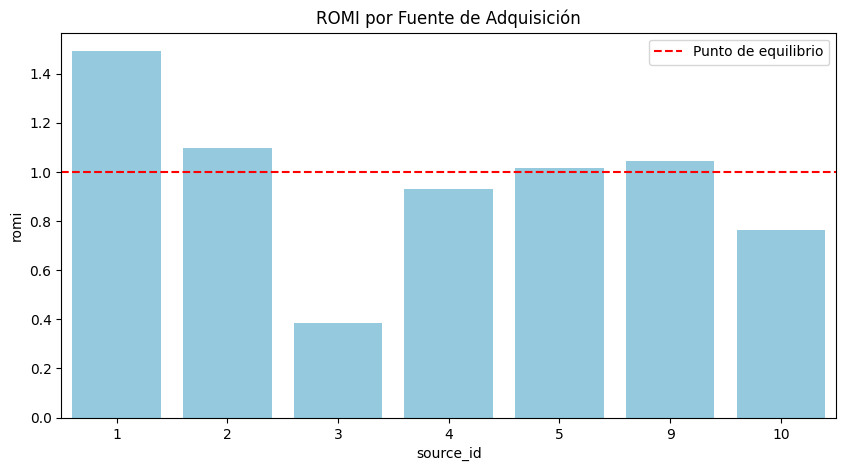

In [26]:
# Obtenemos el LTV por fuente
# Primero unimos los ingresos de los pedidos con la fuente original del usuario
orders_with_source = pd.merge(orders, user_first_source, on='uid')
revenue_by_source = orders_with_source.groupby('source_id')['revenue'].sum().reset_index()

# Unimos con los costos para calcular ROMI
romi_report = pd.merge(revenue_by_source, costs_by_source, on='source_id')
romi_report['romi'] = (romi_report['revenue'] / romi_report['costs'])

# --- PRINT DE RESPUESTA ---
print("\n--- RENTABILIDAD (ROMI) POR FUENTE ---")
print(romi_report[['source_id', 'romi']].sort_values(by='romi', ascending=False))

# Gráfico de ROMI
plt.figure(figsize=(10, 5))
sns.barplot(data=romi_report, x='source_id', y='romi', color='skyblue')
plt.axhline(1, color='red', linestyle='--', label='Punto de equilibrio')
plt.title('ROMI por Fuente de Adquisición')
plt.legend()
plt.show()

## Conclusiones y consejos de inversión

1. ¿En qué métricas nos enfocamos?
Para realizar esta recomendación, me enfoqué en tres indicadores clave:

1-LTV (Lifetime Value): Para entender cuánto dinero aporta cada cliente a largo plazo.

2-CAC (Customer Acquisition Cost): Para medir cuánto nos cuesta atraer a un cliente según su fuente.

3-ROMI (Return on Marketing Investment): La métrica definitiva que nos indica si por cada dólar invertido estamos recuperando la inversión.

2. ¿Qué fuentes y plataformas recomendaría?
Basado en el análisis, mis recomendaciones son:

A-Inversión prioritaria en Fuente 1, 2 y 5: Estas fuentes presentan un ROMI superior a 1 (100%), lo que significa que son rentables. Especialmente las fuentes 1 y 2, que muestran un equilibrio saludable entre un CAC moderado y clientes que generan ingresos constantes.

B-Optimizar o reducir inversión en Fuente 3: A pesar de que la Fuente 3 atrae a muchos usuarios, su CAC es desproporcionadamente alto comparado con el retorno que genera. Es la fuente que más dinero consume y la que más tarda en alcanzar el punto de equilibrio.

C-Priorizar dispositivos Desktop: Los datos muestran que los usuarios de escritorio tienen mayor tiempo de sesión, por ende es más probable que realicen una compra.

3. Conclusiones basadas en los valores métricos
   
-Retención Crítica: La tasa de retención cae drásticamente después del primer mes (por debajo del 10%). Esto sugiere que Showz depende mucho de la adquisición de nuevos clientes. Conclusión: Debemos invertir no solo en anuncios, sino en estrategias de CRM/Email Marketing para que los clientes actuales vuelvan a comprar.

-Tiempo de Conversión: La mayoría de las compras ocurren el mismo día del registro. Esto indica que nuestro marketing actual funciona bien para compras por impulso, pero no estamos nutriendo a los usuarios que necesitan más tiempo para decidir.

-Punto de Equilibrio: En promedio, las cohortes tardan entre 6 y 7 meses en recuperar lo invertido en marketing (ROMI > 100%). Esto significa que cualquier presupuesto de marketing debe planificarse con una visión a largo plazo, no mensual.